In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# UNITS
ev2au = 1/27.211396132
au2ev = 27.211396132
ang2au = 1/0.529177249
au2ang = 0.529177249
au2fs = 1/41.34137333656
fs2au = 41.34137333656
au2debye = 1/0.39343
debye2au = 0.39343
au2nm = 0.052917720859
nm2au = 1/0.052917720859
au2cm1 = 2.1947463137E5
cm12au = 1/(2.1947463137E5)
au2amu = 1/1822.88848325
amu2au = 1822.88848325
thz2au = 1.0/0.029979/au2cm1

def func(x, a, b, c):
    return 

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [3]:
#La suma debe ser una suma de 32 terminos

coeff_matrix = np.zeros((32,4))
coeff_matrix[0,:] = [0,0,1,32849.58]
coeff_matrix[1,:] = [0,1,1,-17553.99]
coeff_matrix[2,:] = [1,0,1,-27625.23]
coeff_matrix[3,:] = [2,0,0,50043.09]
coeff_matrix[4,:] = [4,0,0,336.49]
coeff_matrix[5,:] = [0,1,2,-3360.94]
coeff_matrix[6,:] = [0,3,0,-64.84]
coeff_matrix[7,:] = [1,1,1,18285.40]
coeff_matrix[8,:] = [2,0,1,-7181.44]
coeff_matrix[9,:] = [0,0,4,2553.25]
coeff_matrix[10,:] = [0,2,2,-4905.39]
coeff_matrix[11,:] = [0,4,0,3505.21]
coeff_matrix[12,:] = [1,1,2,-21845.86]
coeff_matrix[13,:] = [1,3,0,-1416.44]
coeff_matrix[14,:] = [2,1,1,5596.86]
coeff_matrix[15,:] = [3,0,1,-142.39]
coeff_matrix[16,:] = [0,0,2,15623.64]
coeff_matrix[17,:] = [0,2,0,72972.84]
coeff_matrix[18,:] = [1,1,0,9857.17]
coeff_matrix[19,:] = [3,0,0,-2376.30]
coeff_matrix[20,:] = [0,2,1,-8550.95]
coeff_matrix[21,:] = [1,0,2,-4597.25]
coeff_matrix[22,:] = [1,2,0,-657.28]
coeff_matrix[23,:] = [2,1,0,1985.36]
coeff_matrix[24,:] = [0,1,3,-5546.12]
coeff_matrix[25,:] = [0,3,1,-11098.50]
coeff_matrix[26,:] = [1,0,3,-9178.03]
coeff_matrix[27,:] = [1,2,1,948.74]
coeff_matrix[28,:] = [2,0,2,-983.04]
coeff_matrix[29,:] = [2,2,0,-584.78]
coeff_matrix[30,:] = [3,1,0,1694.77]
coeff_matrix[31,:] = [0,0,3,4971.79]

def V(R1,R2,theta):
    R1e = 1.5614*ang2au #Amstrong C-S bond; R1e: Equilibrium value of R1
    R2e = 1.1562*ang2au #Amstrong C-O bond; R2e: Equilibrium value of R2
    alpha_1 = 1.95/ang2au #Amstrong^-1
    alpha_2 = 2.34/ang2au #Amstrong^-1
    theta_e = np.pi #Degrees

    aR1 = -alpha_1*(R1-R1e)
    aR2 = -alpha_2*(R2-R2e)

    y_1 = 1.0 - np.exp(aR1)
    y_2 = 1.0 - np.exp(aR2)
    y_3 = np.cos(theta) - np.cos(theta_e)

    suma = 0.0
    for i in range(32):
        suma = suma + (coeff_matrix[i,3]*cm12au)*(y_1**int(coeff_matrix[i,0]))*(y_2**int(coeff_matrix[i,1]))*(y_3**(coeff_matrix[i,2]))
    return(suma)

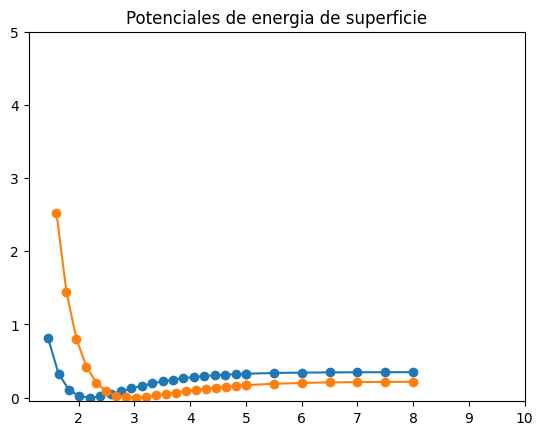

In [4]:
q1 = np.concatenate((np.linspace(1.45,5.0,20),np.linspace(5.0, 8, 7))) #Azul
q2 = np.concatenate((np.linspace(1.6,5.0,20),np.linspace(5.0, 8, 7))) #Naranja
R1_eq = 1.5614*ang2au #Amstrong C-S bond; R1e: Equilibrium value of R1
R2_eq = 1.1562*ang2au #Amstrong C-O bond; R2e: Equilibrium value of R2
theta_eq = np.pi
plt.plot(q1, V(R1_eq,q1,theta_eq), "o-")
plt.plot(q2, V(q2,R2_eq,theta_eq), "o-")
plt.axis([1.1,10,-0.05,5])
plt.title("Potenciales de energia de superficie")
plt.show()

In [5]:
print(V(R1_eq,7.5,np.pi))
print(V(7.5,R2_eq,np.pi))

0.3471562712767736
0.21480652798375546


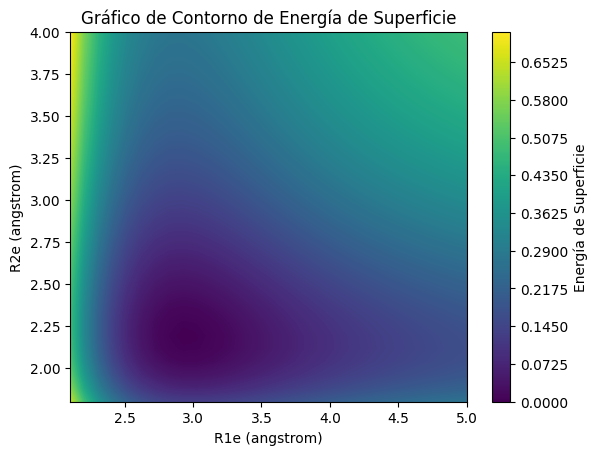

In [6]:
R1e_values = np.linspace(2.1, 5, 29)
R2e_values = np.linspace(1.8, 4, 29) 

R1e, R2e = np.meshgrid(R1e_values, R2e_values)
energia_superficie = np.vectorize(V)(R1e, R2e, np.pi) #np.vectorize para aplicar la función a matrices

plt.contourf(R1e, R2e, energia_superficie,300)
plt.colorbar(label='Energía de Superficie')

plt.xlabel('R1e (angstrom)')
plt.ylabel('R2e (angstrom)')
plt.title('Gráfico de Contorno de Energía de Superficie')
plt.show()


In [7]:
# Generacion del archivo de datos
data_set = np.zeros((len(q1)**2,3)) #Dim(900,3)
l = 0 #Inicializa en 0
for i in range(len(q1)): #R1
    for j in range(len(q2)): #R2
        data_set[l,:] = q1[i],q2[j],V(q1[i],q2[j],np.pi) #Obtenemos valores para R1, R2 y V(R1,R2)
        l = l + 1

df = pd.DataFrame(data_set)
df.to_csv('PotencialOCS_2.csv')
df.columns = ['R1','R2','V'] #Renombramos las columnas
df

,R1,R2,V
0,1.45,1.600000,4.769169
1,1.45,1.778947,4.379094
2,1.45,1.957895,4.140660
3,1.45,2.136842,3.995638
4,1.45,2.315789,3.909743
...,...,...,...
724,8.00,6.000000,0.607018
725,8.00,6.500000,0.610105
726,8.00,7.000000,0.611772
727,8.00,7.500000,0.612672


In [8]:
inputsmodel = df.drop('V', axis=1)
inputsmodel

,R1,R2
0,1.45,1.600000
1,1.45,1.778947
2,1.45,1.957895
3,1.45,2.136842
4,1.45,2.315789
...,...,...
724,8.00,6.000000
725,8.00,6.500000
726,8.00,7.000000
727,8.00,7.500000


In [9]:
# Generacion del archivo de datos
data_set = np.zeros((len(q1)**2,1)) #Dim(900,3)
l = 0 #Inicializa en 0
for i in range(len(q1)): #R1
    for j in range(len(q2)): #R2
        data_set[l,:] = V(q1[i],q2[i],np.pi) #Obtenemos valores para R1, R2 y V(R1,R2)
        l = l + 1

dfR2 = pd.DataFrame(data_set)
#dfR2.to_csv('PotencialOCS_2.csv')
dfR2.columns = ['R1','R2','V','D','alpha','E0'] #Renombramos las columnas
dfR2

ValueError: Length mismatch: Expected axis has 1 elements, new values have 6 elements

In [10]:
#Dejamos los valores de V como targets
target = df.iloc[:,-1]
target

0      4.769169
1      4.379094
2      4.140660
3      3.995638
4      3.909743
         ...   
724    0.607018
725    0.610105
726    0.611772
727    0.612672
728    0.613156
Name: V, Length: 729, dtype: float64

In [11]:
print("El punto minimo del potencial es: ", min(target))
print("El punto maximo del potencial es: ", max(target))

El punto minimo del potencial es:  0.0012756203578342745
El punto maximo del potencial es:  4.769168831074749


array([0.32259596, 1.21958133, 0.14730438, 2.2278128 ])

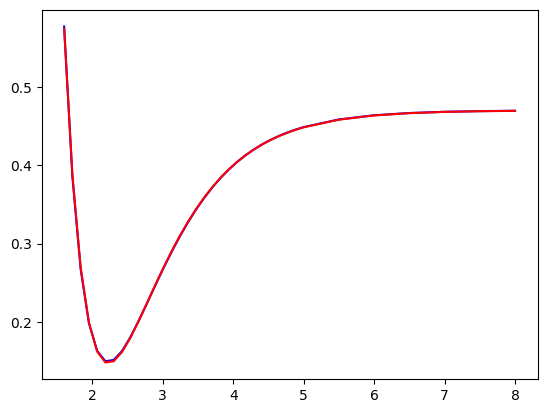

In [28]:
#Creamos una funcion custom_loss incluyendo la perdida fisica de la pinn.
from scipy.optimize import curve_fit
alpha_1 = 1.95/ang2au #Amstrong^-1
alpha_2 = 2.34/ang2au #Amstrong^-1

def custom_loss(target, y_pred):
    D_o = 0.21480652798375546
    D_s = 0.3471562712767736

    lossRi = Do*(1.0 - np.exp(-alpha*(inputsmodel['R2']-R_eq)))**2 + Eeq

    pinnLoss = tf.math.reduce_mean(tf.square(y_pred - lossRi))
    mse_loss = tf.math.reduce_mean(tf.square(y_pred - target))
    totalloss = mse_loss + pinnLoss
    return totalloss

#Obtener los valores de D_i y alpha_i como vectores, como R_i
#(a.b.c) = (D,alpha,E_0)
#Colocarle limites a los valores, asi las aproximaciones son mejores
#D_i = {0,1} // alpha_i = {0,5}, E_0 = {-2,2}
#si el pinnloss esta decente, vamos bien


def morsepotential(q, D, alpha, E0, R_eq):
    return D*(1.0 - np.exp(-alpha*(q-R_eq)))**2 + E0


xdata = np.concatenate((np.linspace(1.6,5.0,30),np.linspace(5.0, 8, 7))) #q2
ydata = V(q1[5],xdata,theta_eq) #Potencial segun xdata
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(morsepotential, xdata, ydata,p0=[3.49440974e-01,  1.22952512e+00, -1.73828756e-03,  2.18903764e+00])
plt.plot(xdata, morsepotential(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
popt

#Varian los R2 en el potencial V(...,R2_eq,t...)



In [ ]:
xdata = np.concatenate((np.linspace(1.6,5.0,30),np.linspace(5.0, 8, 7))) #q2
morse_parameters = np.zeros((len(q1),5))
for i in range(len(q1)):
    ydata = V(q1[i],xdata,theta_eq) #Potencial segun xdata
    popt, pcov = curve_fit(morsepotential, xdata, ydata, p0=[3.49440974e-01,  1.22952512e+00, -1.73828756e-03,  2.18903764e+00])
    morse_parameters[i,0] = q1[i]
    morse_parameters[i,1:] = popt

In [14]:
#Functional API
import tensorflow as tf
from tensorflow import keras
from keras.models import Model # type: ignore
import keras.optimizers # type: ignore
from keras.layers import Dense, Input # type: ignore
tf.random.set_seed(5)


ep = 2000
pv = 0.2
opt = keras.optimizers.RMSprop(learning_rate=0.003)

#Inputs
inputs = Input(shape=(2,))

#Hidden
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(90, activation='relu')(hidden1)
hidden3 = Dense(90, activation='relu')(hidden2)
hidden4 = Dense(90, activation='relu')(hidden3)
hidden5 = Dense(90, activation='relu')(hidden4)
hidden6 = Dense(90, activation='relu')(hidden5)
hidden7 = Dense(64, activation='relu')(hidden6)

#Output
output = Dense(1, activation='linear')(hidden7)

#Model and Compiler
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer=opt, loss=custom_loss) #Como veo mis metricas de la customloss?

model.fit(inputsmodel, target, epochs=ep, validation_split=pv, batch_size=240)


Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 3.0539 - val_loss: 1.5823
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.3094 - val_loss: 1.4700
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8499 - val_loss: 1.1217
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7990 - val_loss: 1.0784
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7813 - val_loss: 1.0936
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7725 - val_loss: 1.1688
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8593 - val_loss: 1.0788
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7367 - val_loss: 1.0695
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7229 - val_loss: 1.0691
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7038 - val_loss: 1.1223
Epoch 11/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7926 - val_loss: 1.0711
Epoch 12/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6

In [15]:
y_pred = model.predict(inputsmodel) #Predecimos datos de Potencial en base a los datos de testing

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


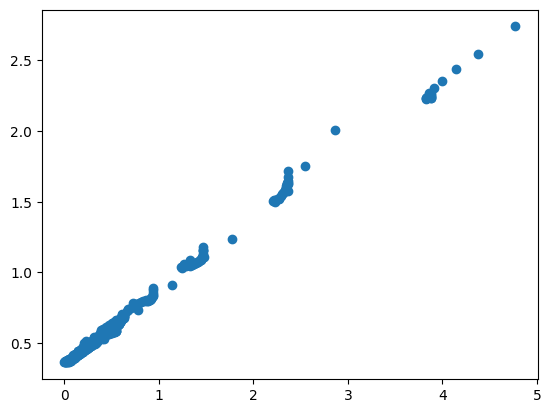

In [16]:
plt.plot(df.V,y_pred,'o')

In [17]:
datos = model.predict_on_batch(inputsmodel) #Estudiar esto
aa= datos.tolist()
lista = []
for i in range(len(aa)):
    lista.append(aa[i][0])
df1 = pd.DataFrame()
df1['predicted'] = lista
df1

,predicted
0,2.739032
1,2.543900
2,2.436697
3,2.353060
4,2.305134
...,...
724,0.679185
725,0.685644
726,0.692128
727,0.698939


(-0.1, 5.0, 0.4, 5.0)

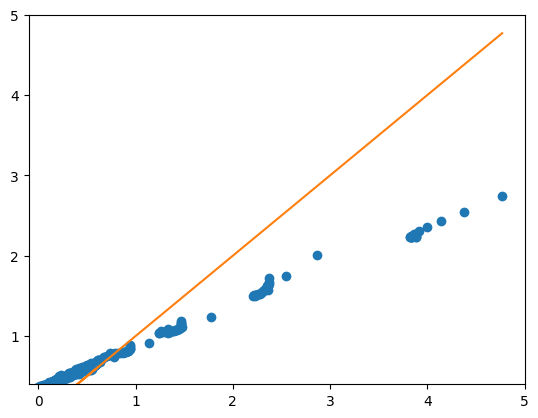

In [18]:
plt.plot(df['V'], df1['predicted'],'o')
plt.plot(df['V'], df['V'])
plt.axis([-0.1,5,0.4,5])

# Recursos de utilidad
https://wandb.ai/ayush-thakur/dl-question-bank/reports/Input-Keras-Layer-Explanation-With-Code-Samples--VmlldzoyMDIzMDU#:~:text=a%20certain%20way.-,What%20Is%20Dim%20In%20A%20Keras%20Layer%3F,tensor%20like%20(3%2C).



# Que son las PINNs?
$\textit{Physics Informed neural networks}$ son redes neuronales que incluyen leyes fisicas para resolver un problema fisico, en la forma de ecuaciones diferenciales parciales adicionales al problema supervisado original.
En las PINNs se combinan el efecto de adherirse a una ecuacion fisica asi como tambien los conocimientos familiares de machine learning

## Como se usa una PINN?
Hacer uso de una PINN incluye anadir un residual en terminos de perdida

## Ecuacion de Burgers
Consideramos la ecuacion de Burgers como ejemplo. En una dimension, la ecuacion de Burgers junto con la condicion de frontera de Dirichlet es:

\begin{split}
  u_t + uu_x - (0.001/\pi)u_{xx}=0, \\
  x \in [-1,1],t\in [0,1], \\
  u(0,x)=-\sin(\pi x), \\
  u(t,-1)=u(t,1)=0
\end{split}

Definimos $f(t,x)$ como:
$$f:= u_t+u_x-(0.01/\pi)u_{xx} $$

Luego se aproxima $u(x,t)$ con una red neuronal profunda. Los parametros compartidos entre $u(t,x)$ y $f(t,x)$ se pueden aprender minimizando la perdida de error de minimos cuadrados:

\begin{split}
    MSE=MSE_u+MSE_f, \\
    MSE_u = {1\over{N_u}}\sum_{i=1}^{N_u}{|u(t_{iu},x_{iu})-u_i|^2}, \\
    MSE_f={1\over{N_f}}\sum_{i=1}^{N_f}{|f(t_{if},x_{if})|^2}
\end{split}

el loss $MSE_u$ corresponde al data inial y a las condiciones de frontera iniciales, mientras que $MSE_f$ refuerza la estructura impuesta por la ecuacion de Burgers en un set finito de punto de colocacion, esto actua como un termino residual.
Los puntos t,x junto con la u denotan el training data inicial y de frontera en $u(t,x)$. Los puntos t,x con f especifican los puntos de colocacion para $f(t,x)$

# WORKFLOW
La funcion morse tiene una forma $$D_O[1-\exp^{-\alpha_O(r_O -r_{eq_O})}]^2$$ para el enlace del oxigeno, y una forma $$D_S[1-\exp^{-\alpha_S(r_S -r_{eq_S})}]^2$$ para el enlace del azufre.

La forma de la ecuacion a agregar a la funcion perdida personalizada es del tipo: $$\underbrace{(\hat{y_i}-y_i)^2}_{\text{MSE}} + \underbrace{(\hat{y_i}-V(r_O,r_S))^2}_{\text{PINN MSE}}$$